<a href="https://colab.research.google.com/github/zeerakt/DataSciencePy/blob/main/KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [1]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = "/content/drive/My Drive/"
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents['images']

images = mat_contents['images']
label = mat_contents['C']
images.shape



Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read. 

In [31]:
import numpy as np 
images= np.transpose(images)
print('Shape after trasposing ',images.shape)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print('Current shape of dataset',im.shape)


Shape after trasposing  (3072, 50)
Current shape of dataset (32, 32, 3, 50)


Shape of dataset single channel is (32, 32, 3)


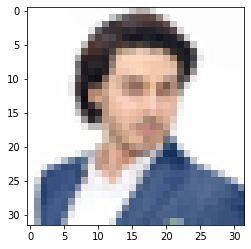

In [33]:

from matplotlib import pyplot as plt
#import cv2
#plt.imshow(im[:,:,:,1])
a= im[:,:,:,5]
plt.imshow(a)
print('Shape of dataset single channel is', a.shape)

You Need to write your code in this block.

Orginal shape of the image was  (689, 921, 3)
Resizing my image to (32, 32, 3)
Reshaping my image to match dataset
Reshaping my image to (32, 32, 3, 1)
Flatting my image to apply distance formula (3072,)


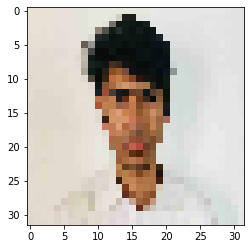

In [37]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray 

# 
#for i in range(50):
 #  G = im[:,:,:,i]
  # G = np.reshape(G,[-1], order="F")                         

#Read your image here
####### Your code here #######
img = cv2.imread(test_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 is BGR while matplotlib is RGB
print('Orginal shape of the image was ',img.shape)
plt.imshow(img)



############################
   

    #Resize your image
####### Your code here #######
res_img = cv2.resize(img, dsize=(32, 32))
plt.imshow(res)
print("Resizing my image to",res.shape)



##############################
   
   
    #Reshape your image as we reshape the image of dataset
####### Your code here #######
print('Reshaping my image to match dataset')
res_img = np.reshape(res_img, [ 32, 32, 3, -1], order="F")
print('Reshaping my image to',res_img.shape)
"""
We need to flatten or reduce the dimension of the data so we can apply the 
eucleadian distance
"""
f_img = np.reshape(res_img,[-1], order="F")
f_img = f_img.astype('float32') # To overcome overflow error
print('Flatting my image to apply distance formula ',end="")
print(f_img.shape)

#############################
    #Calculate Eucleadian distance between your image and dataset 
####### Your code here #######
# My function to be used later
def eucleadian_distance(train,test):
  distance = 0.0
  for i in range (0, 3072): 
    d = pow((test[i]-train[i]),2)
    distance += d
  eu_distance = np.sqrt(distance);
  return eu_distance;


##############################

In this Block you need to fill the code for 1-NN. 

The minimum distance is 4186.085283412176---- At the index  36

Your image resemble with ... aishwarya rai
Despair!!!!


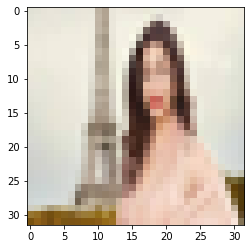

In [38]:
# Write code for 1 NN                                                                           
#Find min distance
#Fine at which point min value exists

####### Your code here #######

def get_neighbors(train, test, num_neighbors): 
 distances = list()
 index = list()
 for i in range(50):
  train_dataset_row = train[:,:,:,i] # Extracting a single channel
  train_dataset_row = np.reshape(train_dataset_row,[-1], order="F") # flattening 
  dist = eucleadian_distance(train_dataset_row, test)   # Passing to distance function
  distances.append(dist)
  index.append(i)
 distances= np.array(distances)  # Convering list to numpy array  
 index = distances.argsort()     # This return sorted indices list from the distance list
 distances.sort()                # Sorting our list 
 neighbors_dis = list()
 min_index = list()
 for x in range(num_neighbors):
   neighbors_dis.append(distances[x])
   min_index.append(index[x])
 return neighbors_dis,min_index   # Function will return multiple values (Neighbor Distance list and )

minimum_dis, mini = get_neighbors(im,f_img,1)
print('The minimum distance is',minimum_dis[0],end="")
print("---- At the index ",mini[0])
print('\nYour image resemble with ...',label[mini[0]][0][0]) 
plt.imshow(im[:,:,:,mini[0]])
print('Despair!!!!')



Write code for 3 NN


The K minimum distances are [4186.085283412176, 4729.996934459895, 5139.295574298097]
Despair


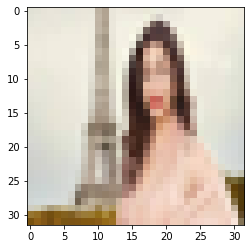

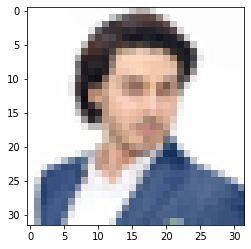

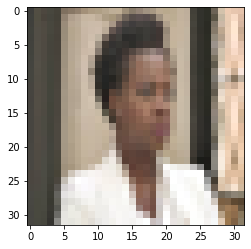

<Figure size 432x288 with 0 Axes>

In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
minimum_dis, mini = get_neighbors(im,f_img,3)
print('The K minimum distances are',minimum_dis)
for k in mini:
 plt.imshow(im[:,:,:,k])
 plt.figure()
print('Despair')

Write code for 5 NN

The K minimum distances are  [4186.085283412176, 4729.996934459895, 5139.295574298097, 5169.456257673528, 5236.2693780973495]
At index: [36, 5, 33, 0, 25]
DespaiRRR


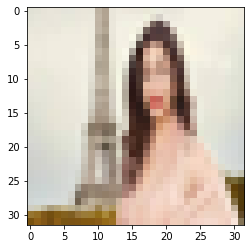

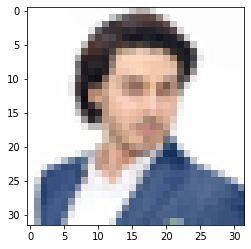

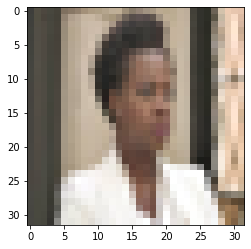

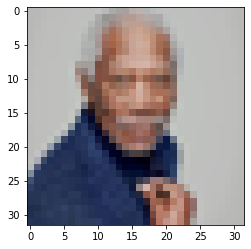

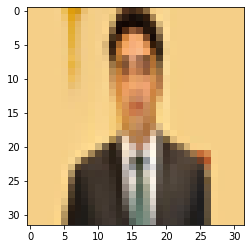

<Figure size 432x288 with 0 Axes>

In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
minimum_dis, mini = get_neighbors(im,f_img,5)
print('The K minimum distances are ',minimum_dis)
print('At index:', mini)
for k in mini:
 plt.imshow(im[:,:,:,k])
 plt.figure()
print('Despair!')
##############################